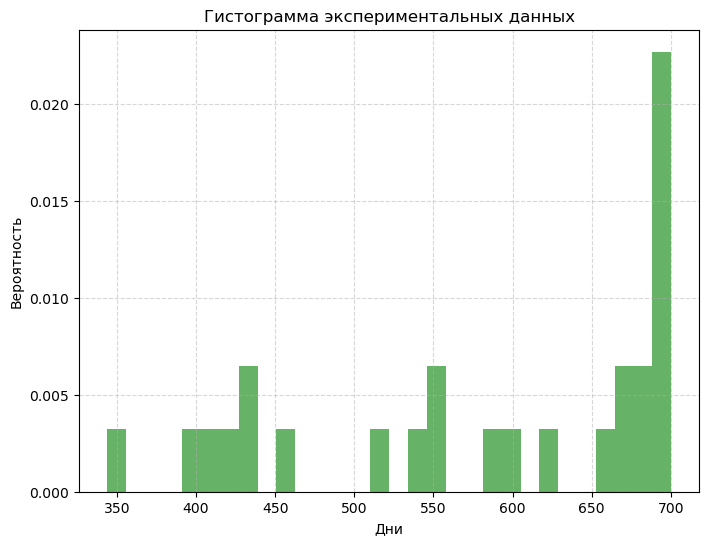

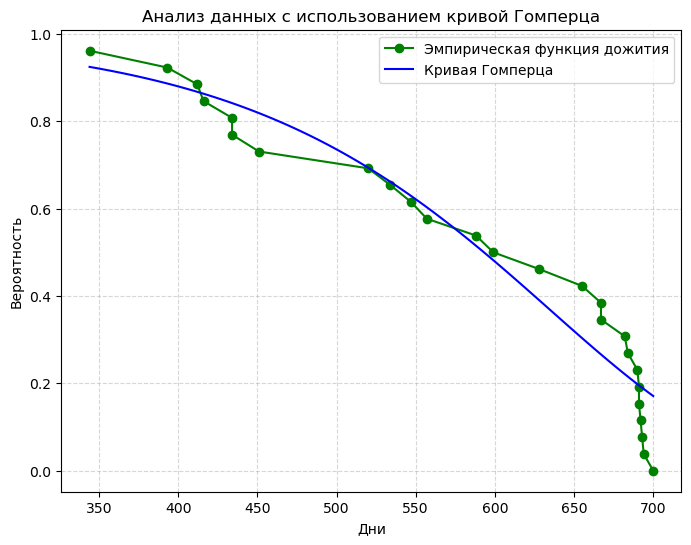

Параметры кривой Гомперца (a, b): [-0.00386978  0.00874757]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('life_expectancy.txt')

data_sorted = np.sort(data)

T_value = float(input(f"Введите значение T: "))
data_sorted = data_sorted[data_sorted <= T_value] 
empirical_survival = 1- np.arange(1, len(data_sorted) + 1) / len(data_sorted) 

def gompers(T_value, a, b):
    return np.exp(a * np.exp(b * T_value)) 

popt, pcov = curve_fit(gompers, data_sorted, empirical_survival, p0=(0.4, 0)) 


plt.figure(figsize=(8, 6))
plt.hist(data_sorted, bins=30, density=True, alpha=0.6, color='g')
plt.title('Гистограмма экспериментальных данных')
plt.xlabel('Дни')
plt.ylabel('Вероятность')
plt.grid(True, linestyle='--', alpha=0.5)


plt.figure(figsize=(8, 6))
plt.plot(data_sorted, empirical_survival, 'go-', label='Эмпирическая функция дожития')
plt.title('Эмпирическая функция дожития')
plt.xlabel('Дни')
plt.ylabel('Вероятность')
plt.grid(True, linestyle='--', alpha=0.5)

T = np.linspace(min(data_sorted), max(data_sorted), 100)
plt.plot(T, gompers(T, *popt), 'b-', label='Кривая Гомперца')

plt.title('Анализ данных с использованием кривой Гомперца')
plt.xlabel('Дни')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

print(f'Параметры кривой Гомперца (a, b): {popt}')